In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

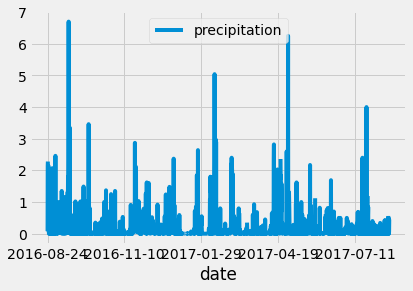

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

last_12mnths = (dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).date()

precipitation_db = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_12mnths ).\
order_by(Measurement.date).all()
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

# Perform a query to retrieve the data and precipitation scores
data_precipitation_score = dt.date(2017,8, 23) - dt.timedelta(days = 365)
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > latestyear).\
order_by(Measurement.date).all()
precipitation[0]

# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(data=precipitation)
precipitation_df.set_index("date", inplace=True)
precipitation_df.rename(columns={"prcp": "precipitation"}, inplace=True)
precipitation_df.head()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot()
plt.legend(loc=9)
plt.savefig("precipitation_analysis.png")
plt.show()


In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [58]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(5).all()
for station in active_stations:
    #print(row)
    # List the stations and the counts in descending order.
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)


In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_df = most_active[0][0]

lha_temp_df = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_df)
active_df=list(lha_temp_df)
print(active_df)

[(54.0, 85.0, 71.66378066378067)]


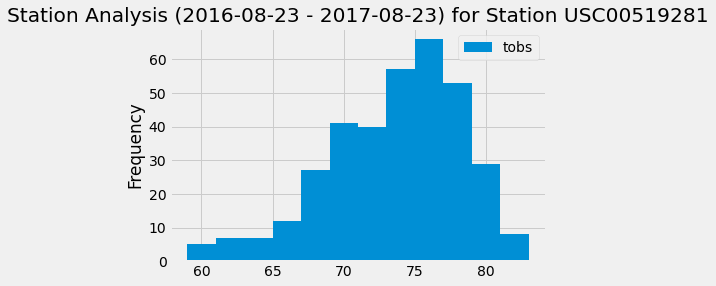

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observ = session.query(Measurement.tobs).\
              filter(Measurement.station==most_active_station[0][0]).\
                                filter(Measurement.date >= last_12mnths).\
                                order_by(Measurement.date.desc()).all()
temp_observ_df = pd.DataFrame(temp_observ)

plt.hist(temp_observ_df['tobs'], bins=12)
plt.ylabel("Frequency")
plt.title(f"Station Analysis ({(last_12mnths)} - {last_date[0]}) for Station { most_active_station[0][0]}")
plt.legend(["tobs"])
plt.show()

# Close session

In [ ]:
# Close Session
session.close()